# OLA 2023
## Project overview
In order to get the project overview, we need to understand how the three classes differ

We start by importing the libraries

In [1]:
from Pricing_Environment import Environment_Pricing
from Advertising_Environment import Advertising_Environment
from User_Classes import UserClass

import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

### Let's define the three classes and observe their differences

In [2]:
uc1 = UserClass(name = "C1")
uc2 = UserClass(name = "C2")
uc3 = UserClass(name = "C3")

To show the differences among the three classes, we start by defining some possible bids. In our case, we consider 20 possible values for the bids, which are contained in the interval $[0,3]$ and equally distributed

In [3]:
bids = np.linspace(0.0, 3, 20) #the bids go from 0 to 3 with 20 equal-length steps
x_pred = np.atleast_2d(bids).T #transformation is done in order to plot it easily
x_pred

array([[0.        ],
       [0.15789474],
       [0.31578947],
       [0.47368421],
       [0.63157895],
       [0.78947368],
       [0.94736842],
       [1.10526316],
       [1.26315789],
       [1.42105263],
       [1.57894737],
       [1.73684211],
       [1.89473684],
       [2.05263158],
       [2.21052632],
       [2.36842105],
       [2.52631579],
       [2.68421053],
       [2.84210526],
       [3.        ]])

### The bid/cost curve

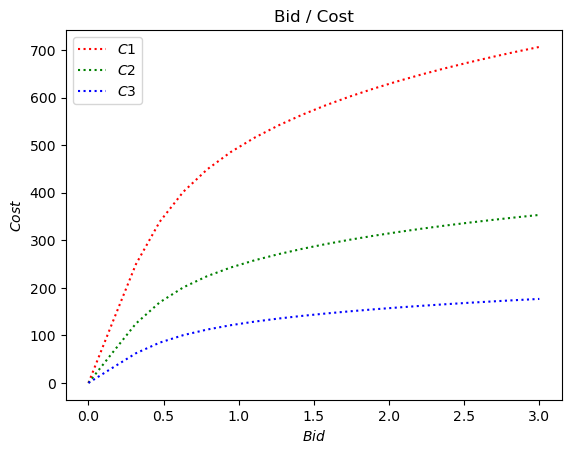

In [4]:
plt.plot(x_pred, uc1.get_total_cost(x_pred), 'r:', label=r'$C1$')
plt.plot(x_pred, uc2.get_total_cost(x_pred), 'g:', label=r'$C2$')
plt.plot(x_pred, uc3.get_total_cost(x_pred), 'b:', label=r'$C3$')
plt.xlabel('$Bid$')
plt.ylabel('$Cost$')
plt.title("Bid / Cost")
plt.legend()
plt.show()

### The bid/click curve

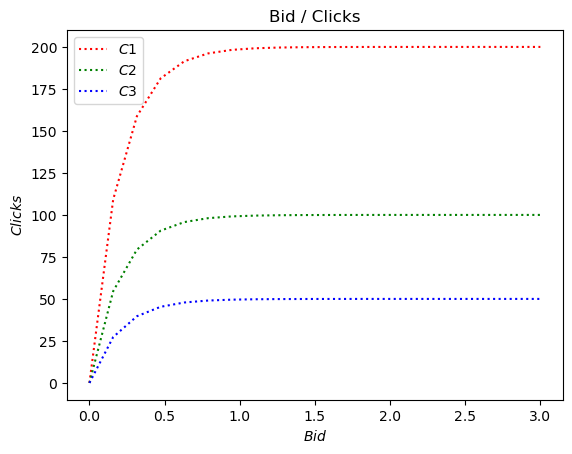

In [5]:
plt.plot(x_pred, uc1.get_click_bids(x_pred), 'r:', label=r'$C1$')
plt.plot(x_pred, uc2.get_click_bids(x_pred), 'g:', label=r'$C2$')
plt.plot(x_pred, uc3.get_click_bids(x_pred), 'b:', label=r'$C3$')
plt.xlabel('$Bid$')
plt.ylabel('$Clicks$')
plt.legend()
plt.title("Bid / Clicks")
plt.show()

### The conversion rates

In [6]:
env_pr = Environment_Pricing()
prices = env_pr.prices # list of prices
classes = env_pr.classes # list of categories

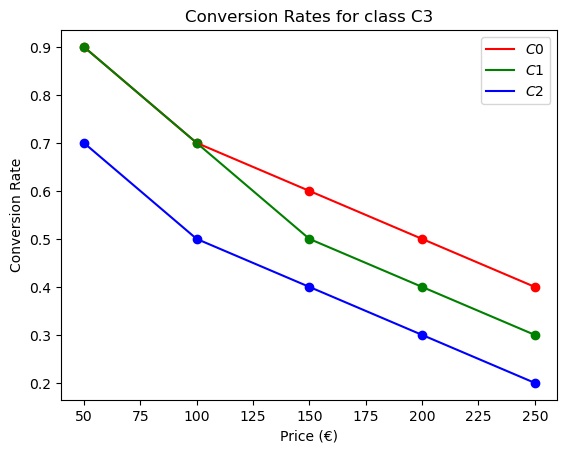

In [12]:
colors = ['r', 'g', 'b']

for class_index in range(len(classes)):
    conv_prob = classes[class_index].get_conversion_probabilities()
    smooth = interp1d(prices, conv_prob, kind='cubic')
    plt.plot(prices, smooth(prices), color=colors[class_index], label=f'$C{class_index}$')
    plt.scatter(prices, conv_prob, color=colors[class_index])
    plt.title("Conversion Rates for class " + classes[class_index].name)
    plt.xlabel("Price (€)")
    plt.ylabel("Conversion Rate")
    plt.legend()        
plt.show()        


# Step 1: learning for pricing
Consider the case in which all the users belong to class C1.

Assume that the curves related to the advertising part of the problem are known, while the curve related to the pricing problem is not.

Apply the UCB1 and TS algorithms, reporting the plots of the average (over a sufficiently large number of runs) value and standard deviation of
- cumulative regret,
- cumulative reward,
- instantaneous regret,
- instantaneous reward

### Let's set the experiment

We can now generate some observations. The time-span is 365 days ($T=365$) and, for each day, we have to observe $n\_obs$ experiments.

Observations are generated by randomly selecting bids and adding noise to the expected number of clicks 

Let's now execute one iteration to see what happens

In [2]:
n_obs = 100 #number of observations to run

noise_std = 5.0 #noise standard deviation

bids = np.linspace(0.0, 3, 20) #the bids go from 0 to 3 with 20 equal-length steps

T = 365  #time-span

# Initialize two empty arrays to store observed bids and clicks
x_obs = np.array([]) #observed bids
y_obs = np.array([]) #observed clicks

# We define the total cost for each bid, starting from 0
total_cost = np.zeros(len(bids))
clicks_per_bid = [] #number of clicks of each bid

We can now execute the whole experiment $n\_obs\times T$ times

In [26]:
for t in range(0, T):
    for i in range(0, n_obs):
        new_x_obs = np.random.choice(bids, 1) #get one random bid from the bids array
        x_obs = np.append(x_obs, new_x_obs) #append the newly observed bid to observed bids list (x_obs)
        
        #Computation is done for class 0, get total cost by multiplying the two functions
        cost_curve = adv_env.classes[0].get_total_cost(x_pred)  
    total_cost += cost_curve.ravel()

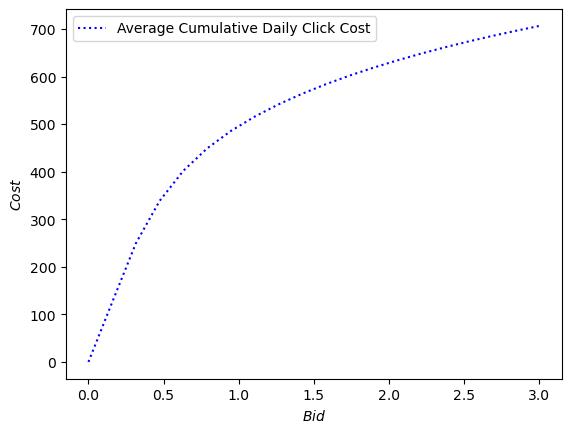

In [27]:
# Total cumulative day average by dividing by 365
plt.plot(x_pred, total_cost/T, 'b:', label='Average Cumulative Daily Click Cost')
plt.xlabel('$Bid$')
plt.ylabel('$Cost$')
plt.legend(loc='upper left')
plt.show()